IMPORTING DEPENDENCIES

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
from sklearn import model_selection, naive_bayes, metrics, feature_extraction

DATA COLLECTION AND ANALYSIS

In [21]:
df = pd.read_csv("diabetes.csv")

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [24]:
df.shape

(768, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [30]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [32]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)

skewness: [2.26607409 1.97803189 2.16941155 2.20703559 1.10297401 2.24144297
 2.26775311 2.23943935 2.26777621]


In [33]:
log_transformed_data = np.log(skew)

In [34]:
print('skewness:',log_transformed_data)

skewness: [0.81804886 0.68210235 0.77445595 0.79165025 0.09801018 0.80711984
 0.81878952 0.80622554 0.81879971]


EXPLORATORY DATA ANALYSIS

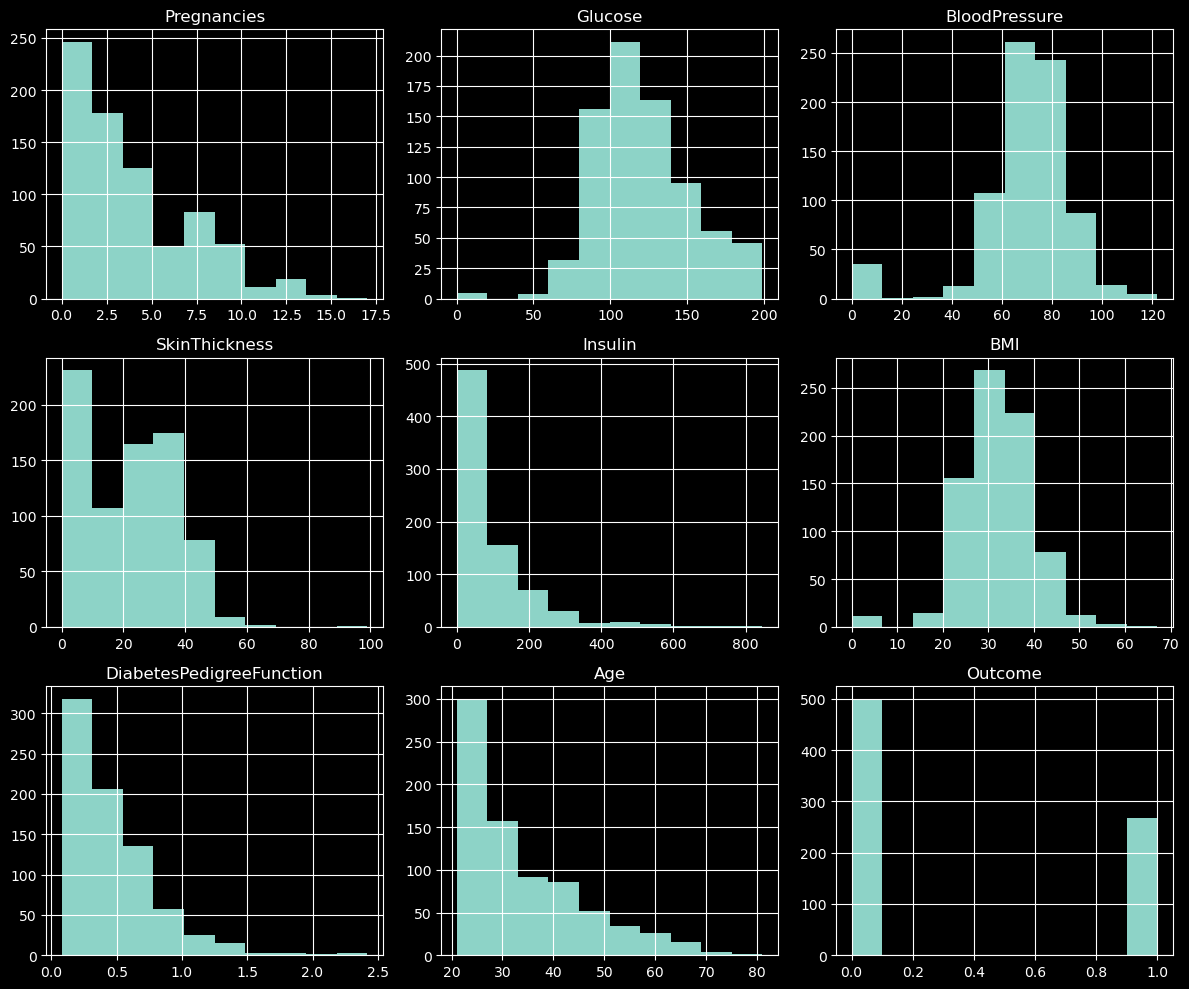

In [35]:
mp.style.use('dark_background')
df.hist(figsize=(12, 10))
mp.tight_layout()
mp.show()

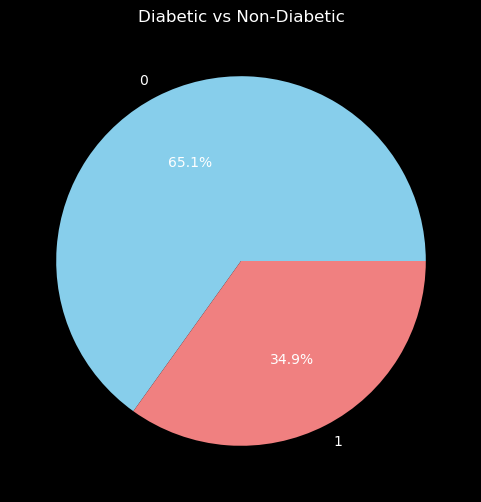

In [36]:
mp.style.use('dark_background')
mp.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
mp.title('Diabetic vs Non-Diabetic')
mp.ylabel('')
mp.show()

C:\Users\Mrunali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


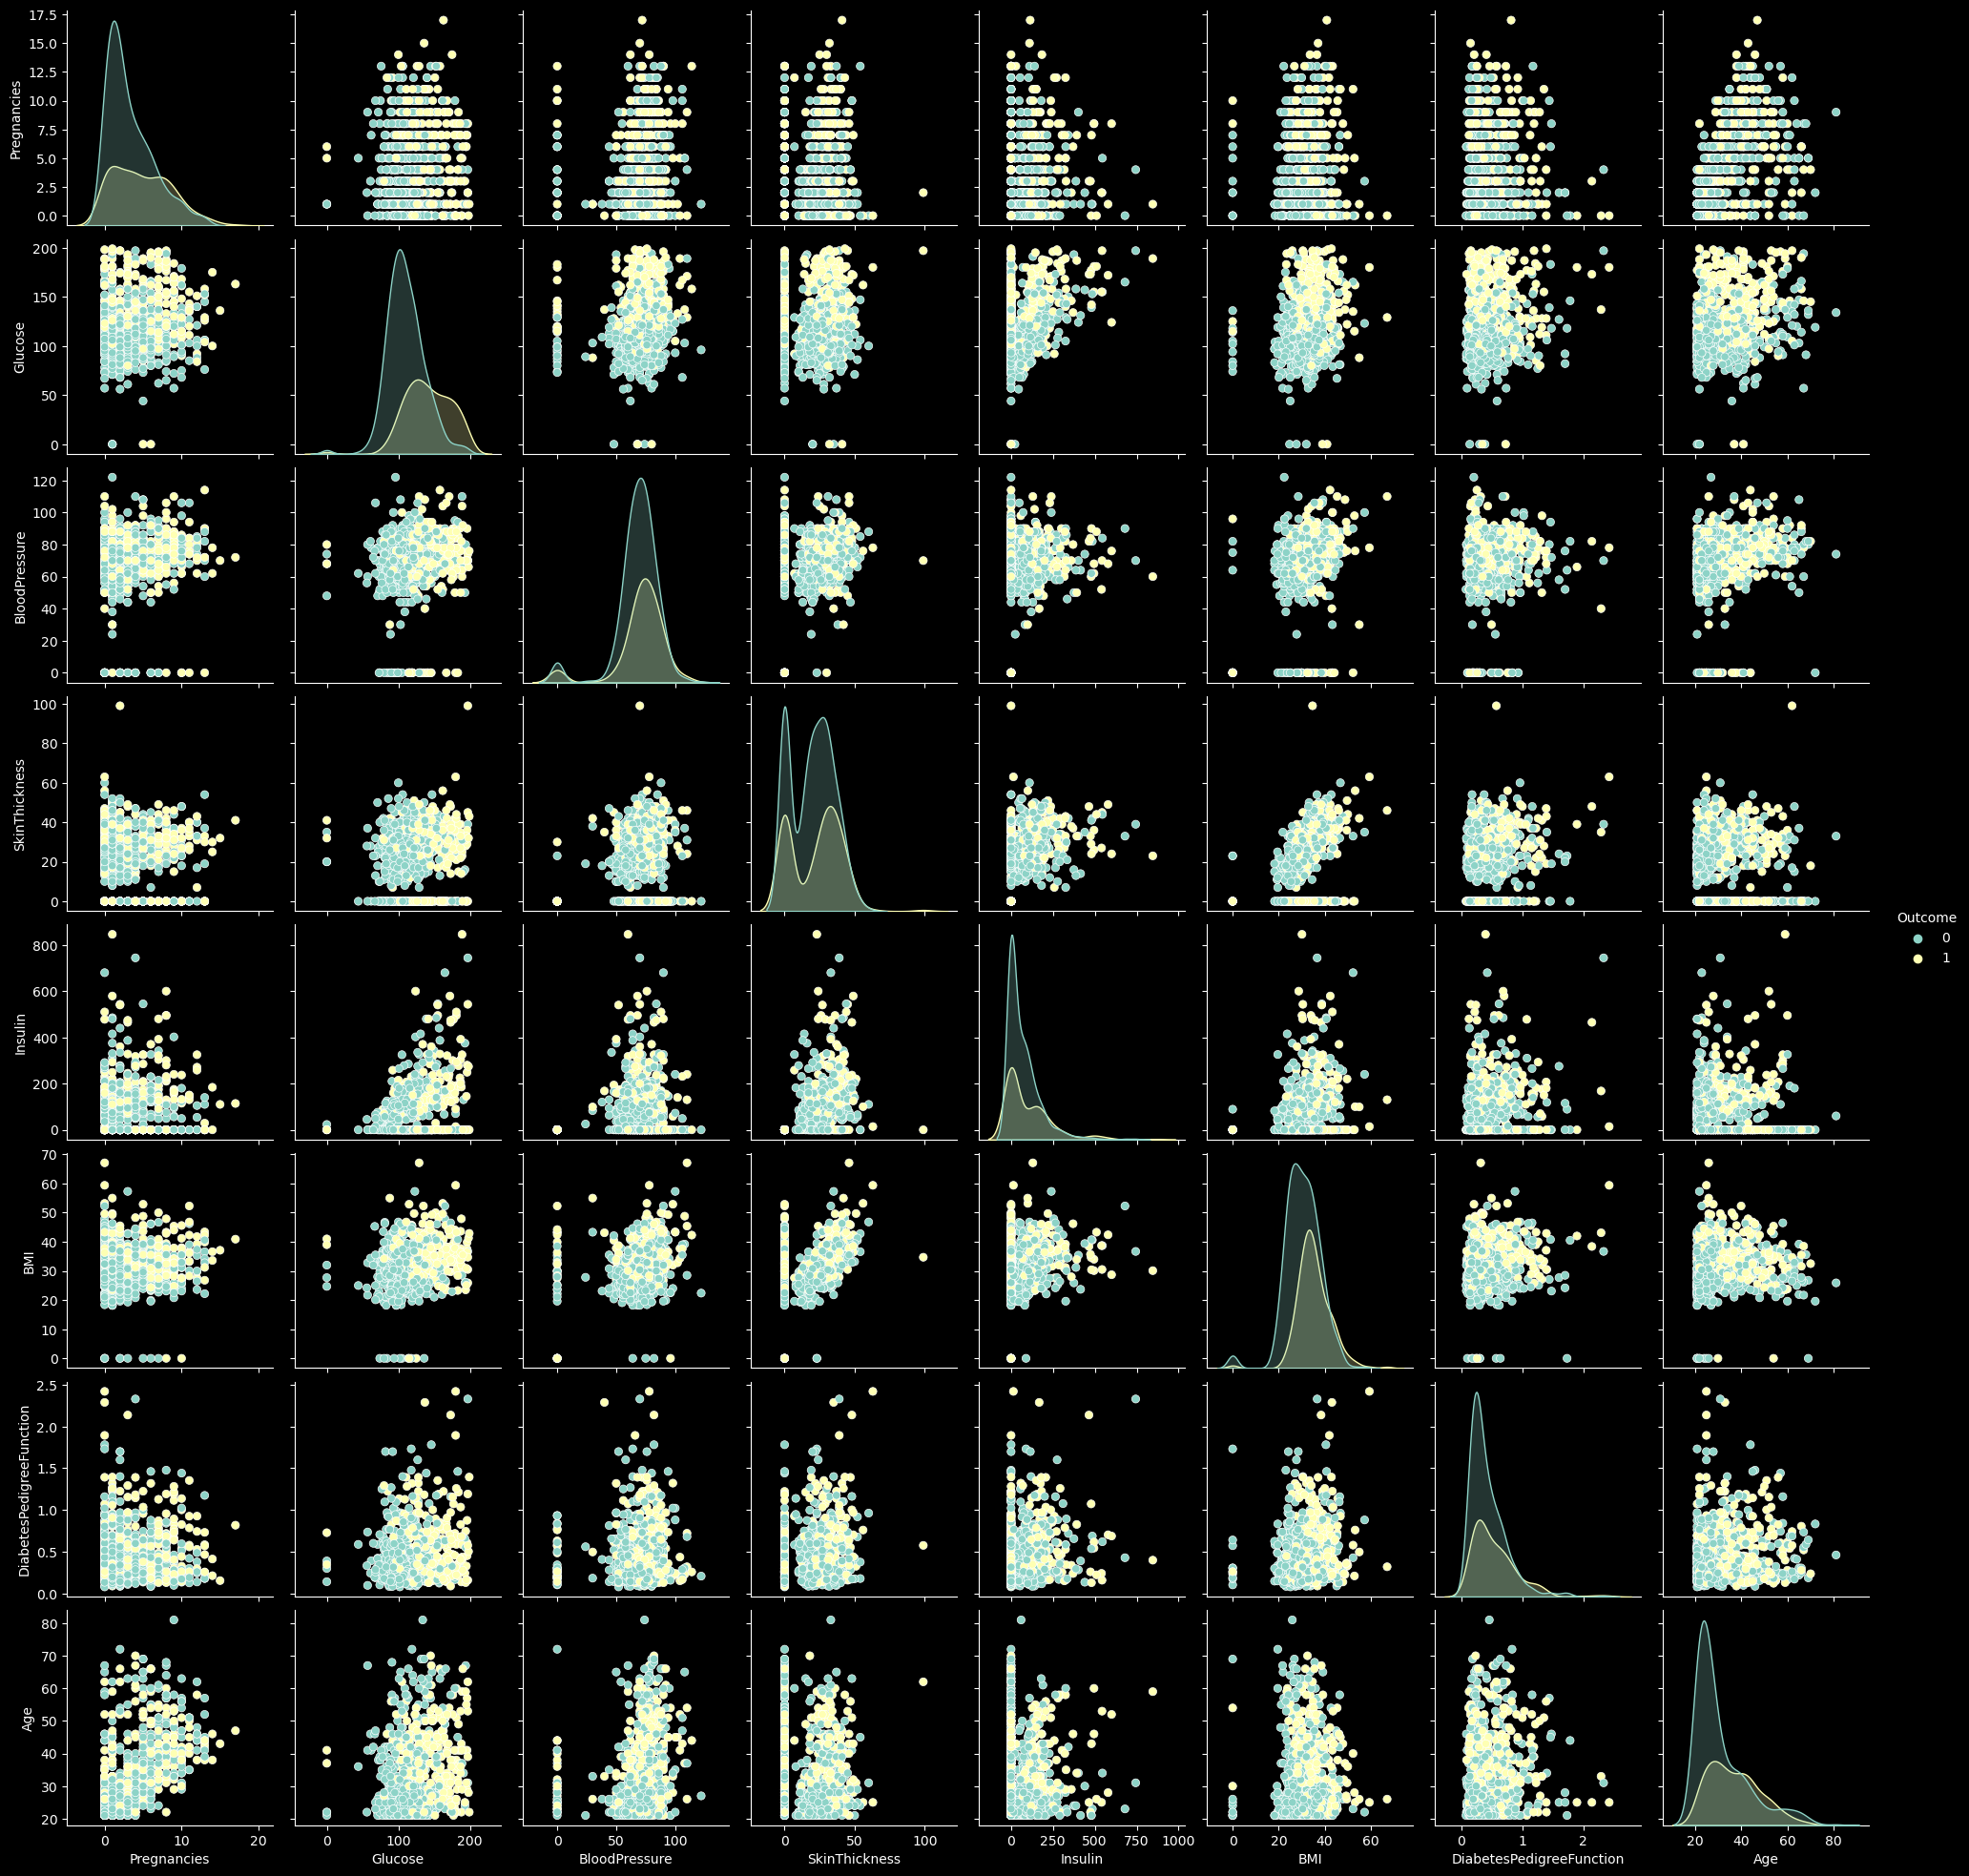

In [37]:
mp.style.use('dark_background')
sns.pairplot(df, hue='Outcome')
mp.show()

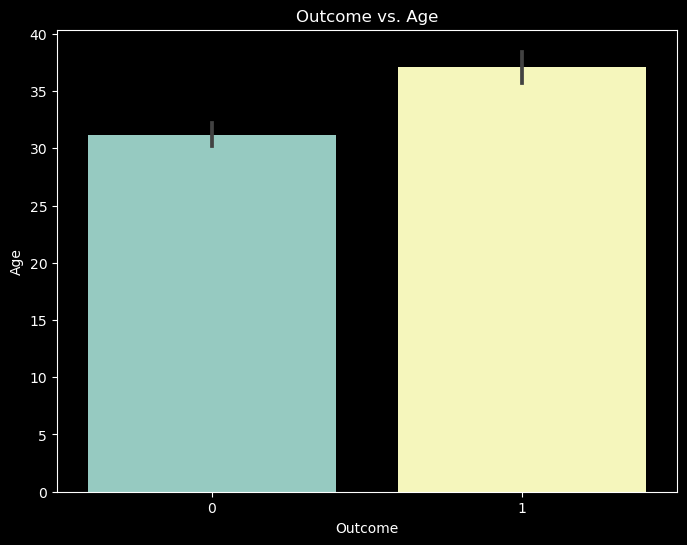

In [38]:
mp.style.use('dark_background')
mp.figure(figsize=(8, 6))
sns.barplot(x='Outcome', y='Age', data=df)
mp.title('Outcome vs. Age')
mp.show()

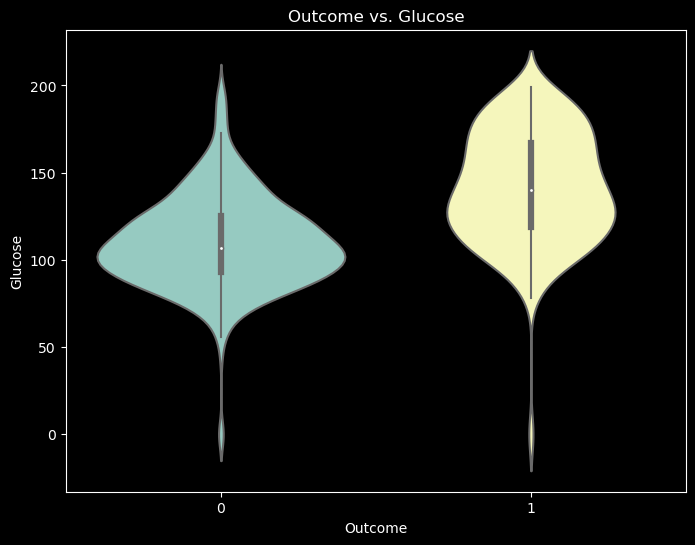

In [39]:
mp.style.use('dark_background')
mp.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Glucose', data=df)
mp.title('Outcome vs. Glucose')
mp.show()

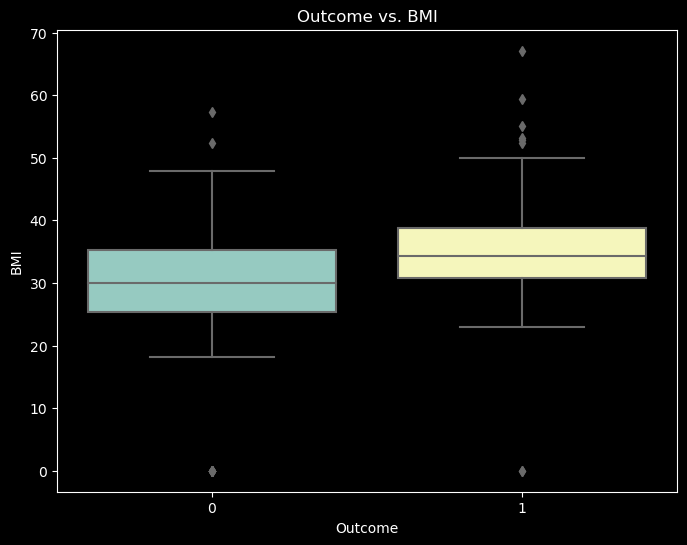

In [40]:
mp.style.use('dark_background')
mp.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
mp.title('Outcome vs. BMI')
mp.show()

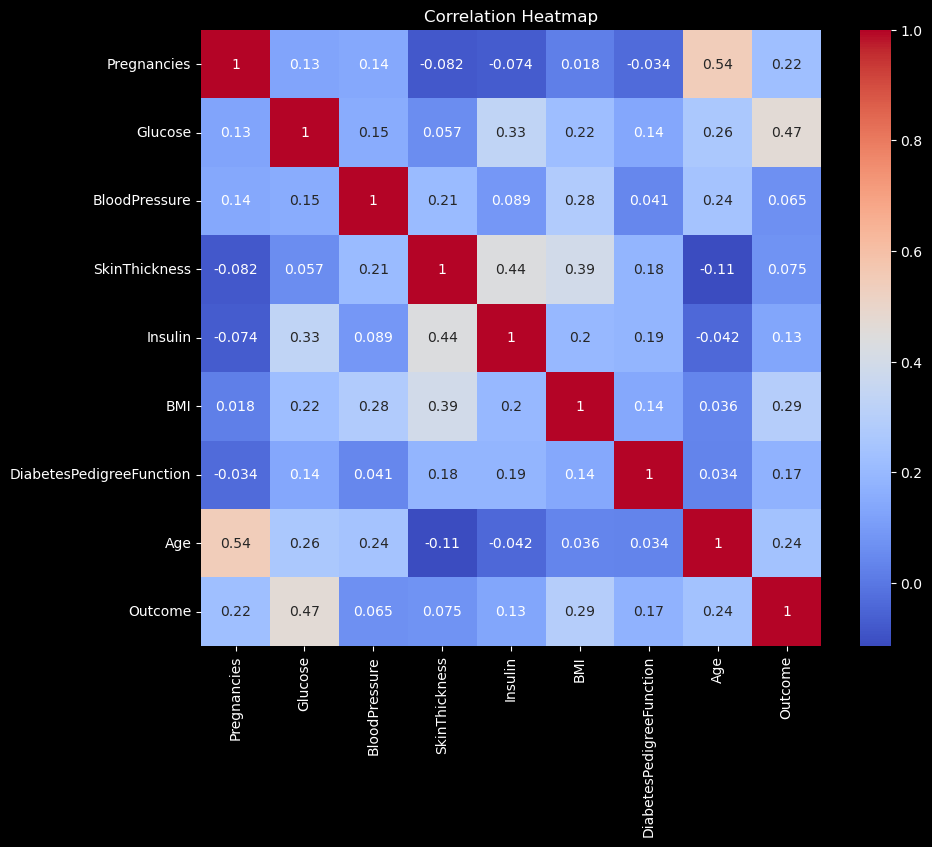

In [41]:
mp.style.use('dark_background')
mp.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
mp.title('Correlation Heatmap')
mp.show()

TRAIN TEST SPLIT

In [42]:
y=df['Outcome']
x=df.drop(['Outcome'], axis=1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [44]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

SUPPORT VECTOR MACHINE - Training the Model

In [45]:
svcm = SVC(kernel='linear')

In [46]:
svcm.fit(x_train, y_train)

SVC(kernel='linear')

In [47]:
y_pred = svcm.predict(x_test)

In [48]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

MODEL EVALUATION 

In [49]:
svcm.score(x_train, y_train)

0.7703583061889251

In [50]:
svcm.score(x_test, y_test)

0.8116883116883117

In [51]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [52]:
print(metrics.confusion_matrix(y_test,y_pred))

[[90  9]
 [20 35]]


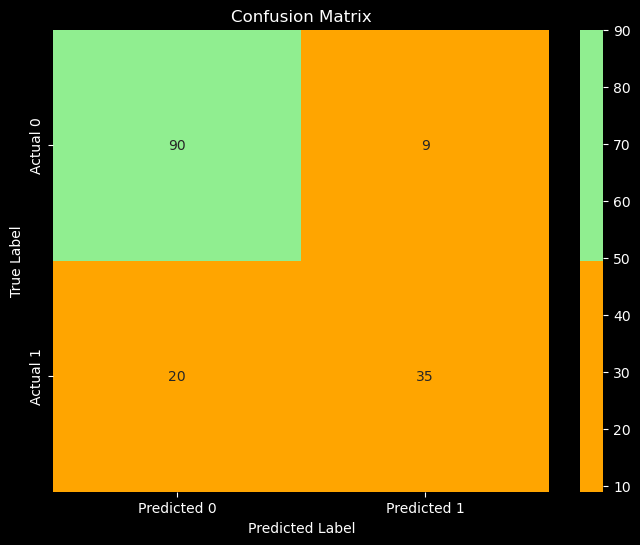

In [53]:
from sklearn.metrics import confusion_matrix

y_pred = svcm.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
colors = ['orange', 'lightgreen']
mp.style.use('dark_background')
mp.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
mp.title('Confusion Matrix')
mp.xlabel('Predicted Label')
mp.ylabel('True Label')
mp.show()

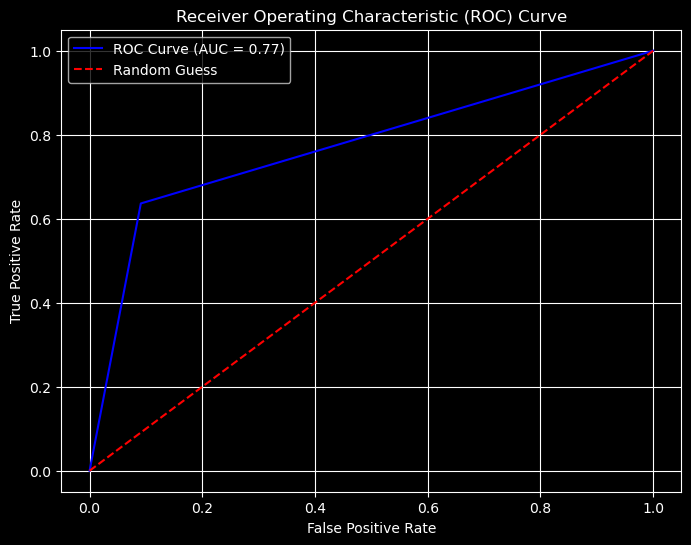

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
mp.style.use('dark_background')
mp.figure(figsize=(8, 6))
mp.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
mp.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
mp.xlabel('False Positive Rate')
mp.ylabel('True Positive Rate')
mp.title('Receiver Operating Characteristic (ROC) Curve')
mp.legend()
mp.grid(True)
mp.show()


MODEL TUNNING

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(x_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [56]:
acc_best = accuracy_score(y_test, y_pred_best)
print('Best Model Accuracy: {:.2f}%'.format(acc_best * 100))

Best Model Accuracy: 81.17%


In [57]:
print(metrics.classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [58]:
print(metrics.confusion_matrix(y_test, y_pred_best))

[[90  9]
 [20 35]]


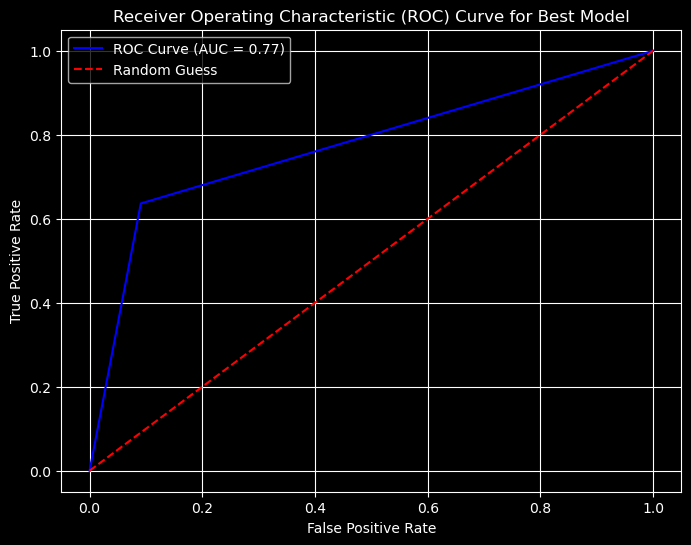

In [59]:
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_best)
auc_score_best = roc_auc_score(y_test, y_pred_best)
mp.figure(figsize=(8, 6))
mp.plot(fpr_best, tpr_best, color='blue', label=f'ROC Curve (AUC = {auc_score_best:.2f})')
mp.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
mp.xlabel('False Positive Rate')
mp.ylabel('True Positive Rate')
mp.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
mp.legend()
mp.grid(True)
mp.show()

USING SIGMOID KERNEL

In [60]:
svcm1 = SVC(kernel='sigmoid')

In [61]:
svcm1.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [62]:
y_pred = svcm1.predict(x_test)

In [63]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [64]:
svcm1.score(x_train, y_train)

0.6938110749185668

In [65]:
svcm1.score(x_test, y_test)

0.6688311688311688

In [66]:
accuracy_score(y_test, y_pred)

0.6688311688311688

In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        99
           1       0.54      0.47      0.50        55

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.67      0.66       154



USING RBF KERNEL

In [68]:
svcm2 = SVC(kernel = 'rbf')

In [69]:
svcm2.fit(x_train, y_train)

SVC()

In [70]:
y_pred = svcm2.predict(x_test)

In [71]:
accuracy_score(y_test, y_pred)

0.8051948051948052

In [72]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        99
           1       0.82      0.58      0.68        55

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154



SMOTE TECHNIQUE

In [73]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [75]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 213
Before OverSampling, counts of label '0': 401 

After OverSampling, counts of label '1': 401
After OverSampling, counts of label '0': 401


In [76]:
svcm = SVC(kernel = 'linear')

In [77]:
svcm.fit(X_train_res, y_train_res.ravel()) 

SVC(kernel='linear')

In [78]:
y_pred = svcm.predict(x_test) 

In [79]:
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



In [ ]:
print("Enter the features for the person:")
features = []
for column in x.columns:
    value = float(input(f"Enter value for {column}: "))
    features.append(value)

input_data = np.array([features])
prediction = svcm.predict(input_data)

if prediction[0] == 1:
    print("The person is Diabetic.")
else:
    print("The person is Non-Diabetic.")

Enter the features for the person:
